In [3]:
#prepare credit card data
import pandas as pd
cc = pd.read_csv('data/CreditCard.csv')
columns = ['CUST_ID', 'PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 
           'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS',
           'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
df_cc = cc.dropna()[columns]
df_cc['TOTAL_PURCHASES'] = df_cc.PURCHASES + df_cc.CASH_ADVANCE + 0.01
df_cc['PRC_CASH_ADVANCE'] = df_cc.CASH_ADVANCE/df_cc.TOTAL_PURCHASES
dfcc = df_cc[['CUST_ID', 'TOTAL_PURCHASES', 'PRC_CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
       ]]
columns2 = ['TOTAL_PURCHASES', 'PRC_CASH_ADVANCE', 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
dfcc[columns2].to_csv('data/Credit_Card.csv', index=False)
dfcc[columns2].head()

,TOTAL_PURCHASES,PRC_CASH_ADVANCE,CREDIT_LIMIT,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,95.410000,0.000000,1000.0,139.509787,0.000000
1,6442.955483,0.999998,7000.0,1072.340217,0.222222
2,773.180000,0.000000,7500.0,627.284787,0.000000
4,16.010000,0.000000,1200.0,244.791237,0.000000
5,1333.290000,0.000000,1800.0,2407.246035,0.000000


In [4]:
#prepare plots for k-means and dbscan

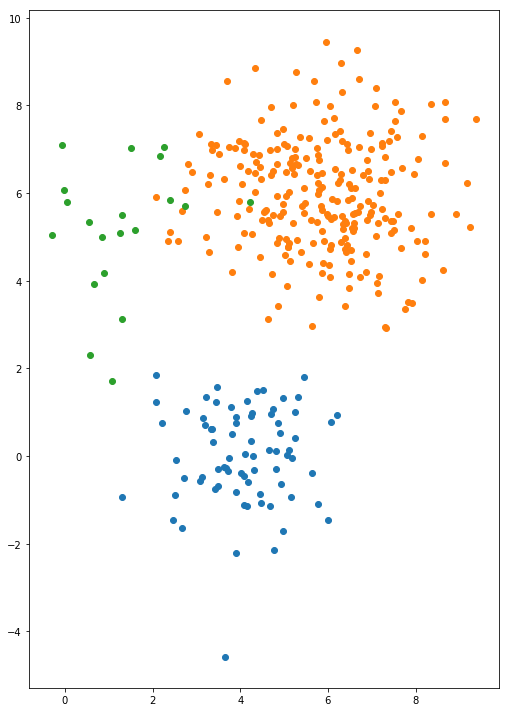

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create data from three different multivariate distributions
X_1 = np.random.multivariate_normal(mean=[4, 0], cov=[[1, 0], [0, 1]], size=75)
X_2 = np.random.multivariate_normal(mean=[6, 6], cov=[[2, 0], [0, 2]], size=250)
X_3 = np.random.multivariate_normal(mean=[1, 5], cov=[[1, 0], [0, 2]], size=20)
df = np.concatenate([X_1, X_2, X_3])

# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X_1[:, 0], X_1[:, 1])
ax.scatter(X_2[:, 0], X_2[:, 1])
ax.scatter(X_3[:, 0], X_3[:, 1])
ax.set_aspect('equal')
plt.tight_layout()

/Users/lindenlu/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/lindenlu/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


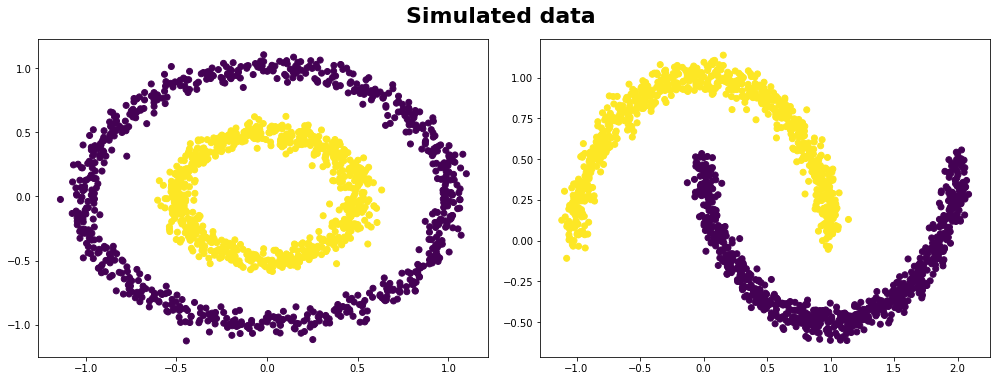

In [9]:
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering

# Cricles
X1 = make_circles(factor=0.5, noise=0.05, n_samples=1500)

# Moons
X2 = make_moons(n_samples=1500, noise=0.05)

fig, ax = plt.subplots(1, 2)
for i, X in enumerate([X1, X2]):
    fig.set_size_inches(14, 5)
    sp = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
    sp.fit(X[0])
    labels = sp.labels_
    ax[i].scatter(X[0][:, 0], X[0][:, 1], c=labels)
plt.suptitle('Simulated data', y=1.05, fontsize=22, fontweight='semibold')
plt.tight_layout();

In [10]:
#DBSCAN on credit card dataset
from sklearn.preprocessing import StandardScaler

cc = pd.read_csv('data/Credit_Card.csv')
x_cc = StandardScaler().fit_transform(cc)

from sklearn.cluster import DBSCAN

# Apply DBSCAN
db = DBSCAN(eps=0.5, metric='euclidean', min_samples=10)
mdl = db.fit(x_cc)

print(f'Number of core points = {mdl.components_.shape[0]}')
print(f'Cluster labels: {np.unique(mdl.labels_)}')

from collections import Counter 
cnt =  Counter(np.sort(mdl.labels_))

# Display some basic results of the clustering
print('DBSCAN Cluster membership.')
print(30*'-')
for itm in cnt:
    if itm < 0:
        print(f'Noise Cluster : {cnt[itm]:>4d} members')
    else:
        print(f'Cluster {itm}     : {cnt[itm]:>4d} members')

Number of core points = 7472
Cluster labels: [-1  0  1  2  3]
DBSCAN Cluster membership.
------------------------------
Noise Cluster :  781 members
Cluster 0     : 7810 members
Cluster 1     :   16 members
Cluster 2     :    9 members
Cluster 3     :   20 members
